## Data Loading


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))


In [2]:
df_bureau = pd.read_csv("dataset/bureau_data.csv")
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [3]:
df_bureau.shape

(50000, 8)

In [4]:
df_customers = pd.read_csv("dataset/customers.csv")
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [5]:
df_customers.shape

(50000, 12)

In [6]:
df_loans = pd.read_csv("dataset/loans.csv")
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.000,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.000,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.000,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [7]:
df_loans.shape

(50000, 15)

In [8]:
df = pd.merge(df_bureau,df_customers,on="cust_id")
df.shape

(50000, 19)

In [9]:
df = pd.merge(df,df_loans)
df.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,1,1,42,0,0,3,7,44,M,...,2467000,49340.000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,3,1,96,12,60,5,4,38,M,...,3883000,77660.000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,2,1,82,24,147,6,58,46,F,...,2170000,43400.000,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,3,0,115,15,87,5,26,55,F,...,1747000,34940.000,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,4,2,120,0,0,5,10,37,M,...,4520000,90400.000,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   number_of_open_accounts      50000 non-null  int64  
 2   number_of_closed_accounts    50000 non-null  int64  
 3   total_loan_months            50000 non-null  int64  
 4   delinquent_months            50000 non-null  int64  
 5   total_dpd                    50000 non-null  int64  
 6   enquiry_count                50000 non-null  int64  
 7   credit_utilization_ratio     50000 non-null  int64  
 8   age                          50000 non-null  int64  
 9   gender                       50000 non-null  object 
 10  marital_status               50000 non-null  object 
 11  employment_status            50000 non-null  object 
 12  income                       50000 non-null  int64  
 13  number_of_depend

In [11]:
df["default"] = df["default"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   number_of_open_accounts      50000 non-null  int64  
 2   number_of_closed_accounts    50000 non-null  int64  
 3   total_loan_months            50000 non-null  int64  
 4   delinquent_months            50000 non-null  int64  
 5   total_dpd                    50000 non-null  int64  
 6   enquiry_count                50000 non-null  int64  
 7   credit_utilization_ratio     50000 non-null  int64  
 8   age                          50000 non-null  int64  
 9   gender                       50000 non-null  object 
 10  marital_status               50000 non-null  object 
 11  employment_status            50000 non-null  object 
 12  income                       50000 non-null  int64  
 13  number_of_depend

In [12]:
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

### To avoid data leakage problem we are splitting our data before modifying itself

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop('default',axis=1)
y = df["default"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
df_train = pd.concat([X_train,y_train],axis=1)
df_test = pd.concat([X_test,y_test],axis=1)

In [14]:
df_train.shape,df_test.shape

((37500, 33), (12500, 33))

### Data Cleaning

In [15]:
df_train.isnull().sum()

cust_id                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd                       0
enquiry_count                   0
credit_utilization_ratio        0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_a

In [16]:
df_train["residence_type"].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [17]:
resmod = df_train["residence_type"].mode()[0]
df_train["residence_type"] = df_train["residence_type"].fillna(resmod)
df_train["residence_type"].isna().sum()

0

In [18]:
df_train["residence_type"].unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [19]:
df_train.isna().sum()

cust_id                        0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_count                  0
credit_utilization_ratio       0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_

In [20]:
df_train.duplicated().sum()

0

In [21]:
df_test.duplicated().sum()

0

In [22]:
numerical_cols = df_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()

In [23]:
len(numerical_cols),len(categorical_cols)

(20, 12)

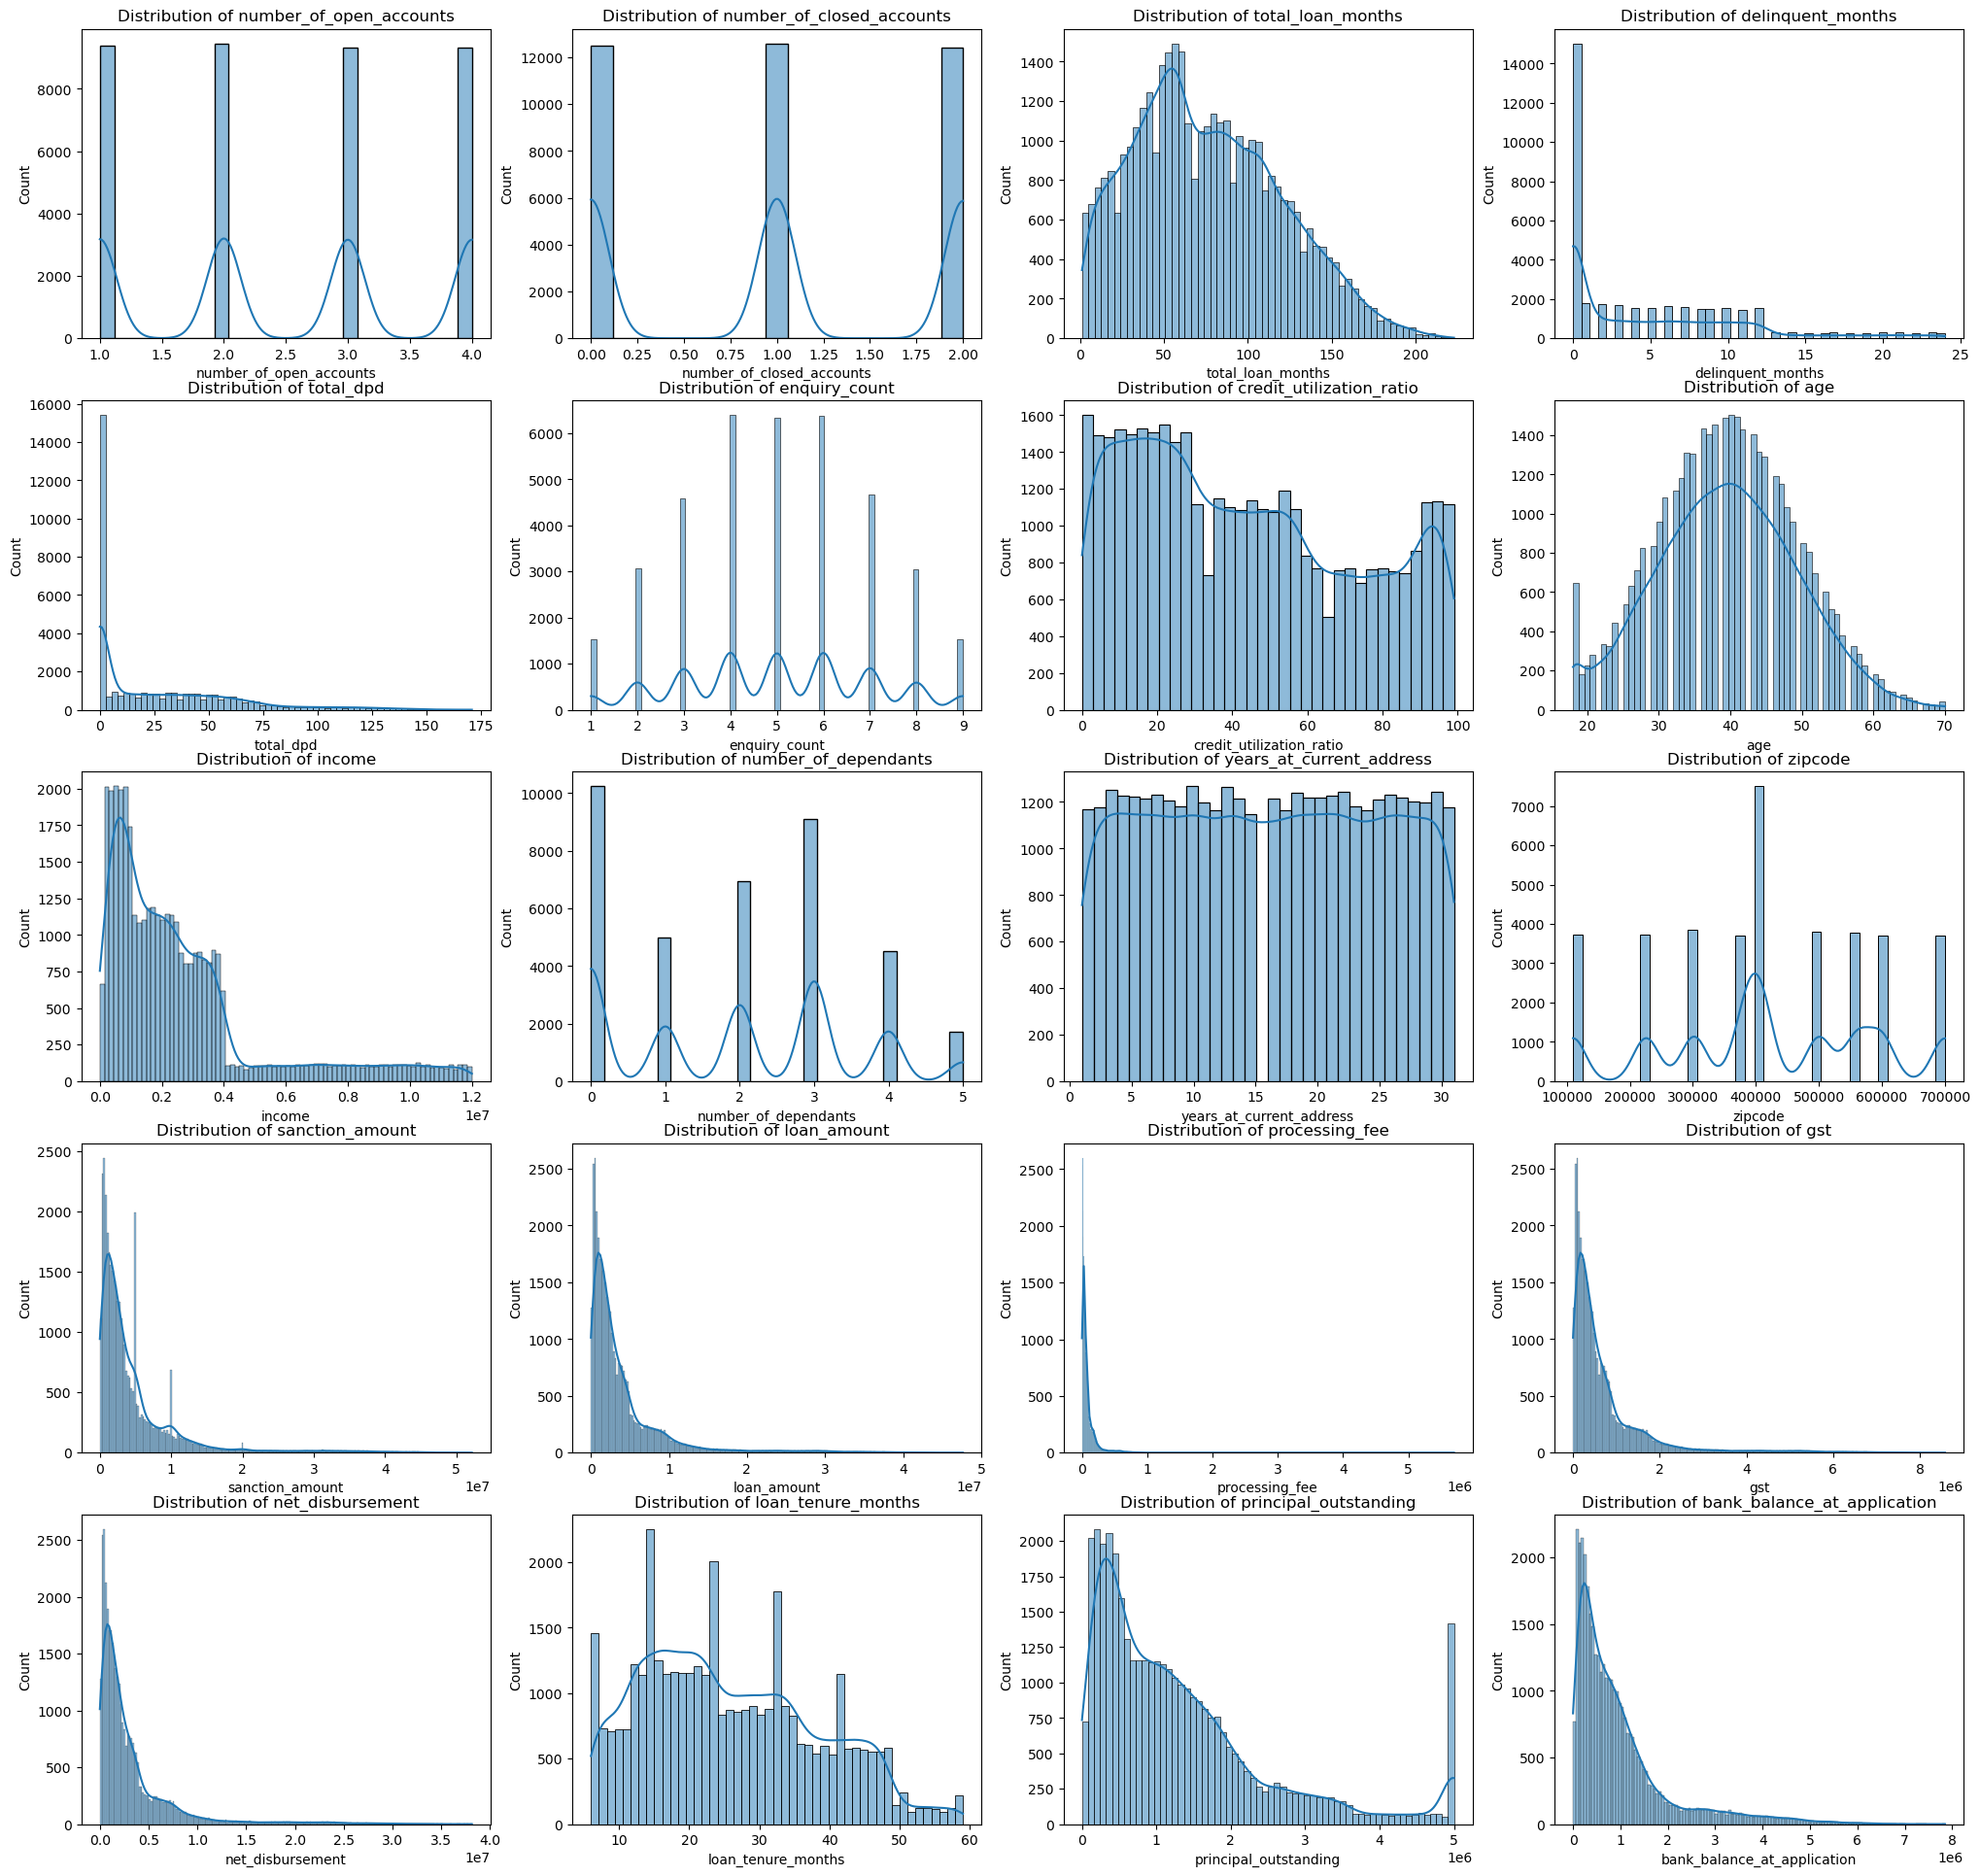

In [24]:
plt.figure(figsize=(25,24))
for i,col in enumerate(numerical_cols):
    plt.subplot(5,4,i+1)
    sb.histplot(df_train[col],kde=True)
    plt.title(f"Distribution of {col}")
plt.show()

In [25]:
# Check the processing fee. Stakeholder gives that processing_fee should not be greater than 30%.
df_train["processing_fee"].describe()

count     37500.000
mean      80724.109
std      120830.650
min           0.000
25%       19180.000
50%       44700.000
75%       92000.000
max     5698029.901
Name: processing_fee, dtype: float64

In [26]:
df_train[df_train["processing_fee"]>df_train["loan_amount"]][["loan_amount","processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.023
9898,3626000,5293543.524
47089,1738000,1858964.768
33705,3812000,5678020.859
12294,4639000,5698029.901
28174,966000,1214492.673
29305,2616000,3036378.005


In [27]:
df_train_1 = df_train[(df_train["processing_fee"]/df_train["loan_amount"])<=0.03].copy()
df_train_1.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,age,gender,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
27434,C27435,4,2,90,6,33,8,59,45,F,...,3276000,65520.000,589680,2620800,24,905176,566117,2022-04-21,2022-05-21,0
13400,C13401,3,1,119,4,17,4,92,29,M,...,2540000,50800.000,457200,2032000,33,1008916,951329,2020-11-24,2020-12-11,0
883,C00884,2,1,83,14,78,4,83,50,F,...,1920000,38400.000,345600,1536000,19,1382399,771873,2019-08-25,2019-09-19,0
7303,C07304,1,1,37,0,0,5,34,43,F,...,298000,5960.000,53640,238400,21,170015,117343,2020-04-16,2020-05-05,0
45124,C45125,2,0,62,6,28,5,19,31,F,...,260000,5200.000,46800,208000,45,72025,67719,2024-01-26,2024-02-17,0


In [28]:
df_test = df_test[(df_test["processing_fee"]/df_test["loan_amount"])<=0.03].copy()


In [29]:
df_train_1[(df_train_1["processing_fee"]/df_train_1["loan_amount"])>0.03][["loan_amount","processing_fee"]]

,loan_amount,processing_fee


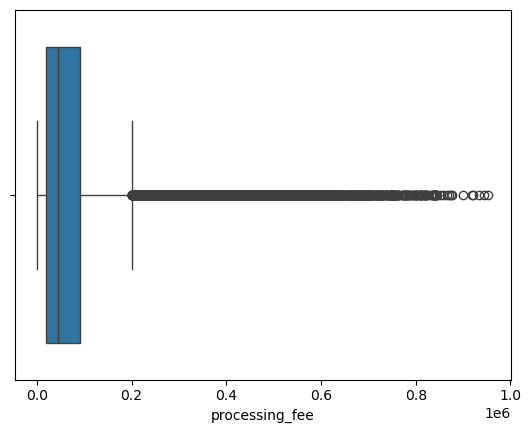

In [30]:
sb.boxplot(x = df_train_1["processing_fee"])
plt.show()

In [31]:
# Check the gst feature. No record should have greater than 20% gst on the approved loan amount.
df_train_1[(df_train_1["gst"]/df_train_1["loan_amount"])>0.2][["gst","loan_amount"]]

,gst,loan_amount


So, no record have gst greater than 20% on the approved loan amount.

In [32]:
# Check the net_disbursement feature. No record should have net_disbursement>sanction_amount 
df_train_1[df_train_1["net_disbursement"]>df_train_1["sanction_amount"]][["net_disbursement","sanction_amount"]]

,net_disbursement,sanction_amount


### Univariate Analysis of Categorical Columns

In [33]:
categorical_cols

['cust_id',
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_id',
 'loan_purpose',
 'loan_type',
 'disbursal_date',
 'installment_start_dt']

In [34]:
categorical_cols.remove('cust_id')

In [35]:
categorical_cols.remove('loan_id')
categorical_cols.remove('disbursal_date')
categorical_cols.remove('installment_start_dt')

In [36]:
numerical_cols.remove('zipcode')
categorical_cols.append('zipcode')
categorical_cols.append('default')

In [37]:
for col in categorical_cols:
    print(col, ",", df_train_1[col].unique())

gender , ['F' 'M']
marital_status , ['Single' 'Married']
employment_status , ['Salaried' 'Self-Employed']
residence_type , ['Owned' 'Mortgage' 'Rented']
city , ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state , ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
loan_purpose , ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type , ['Secured' 'Unsecured']
zipcode , [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
default , [0 1]


In [38]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal','Personal')
df_train_1["loan_purpose"].unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

In [39]:
df_test['loan_purpose'] = df_test['loan_purpose'].replace('Personaal','Personal')

## Exploratory Data Analysis 

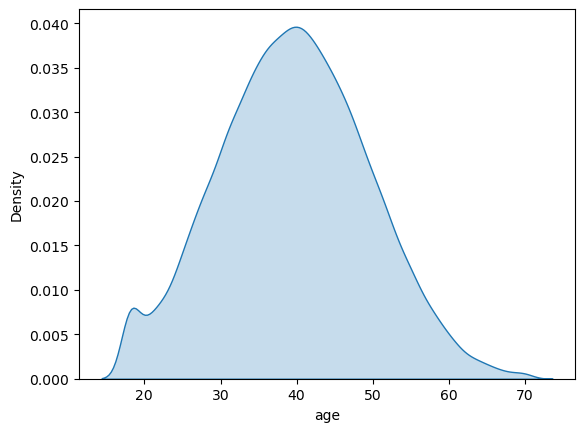

In [40]:
sb.kdeplot(df_train_1["age"],fill=True)
plt.show()

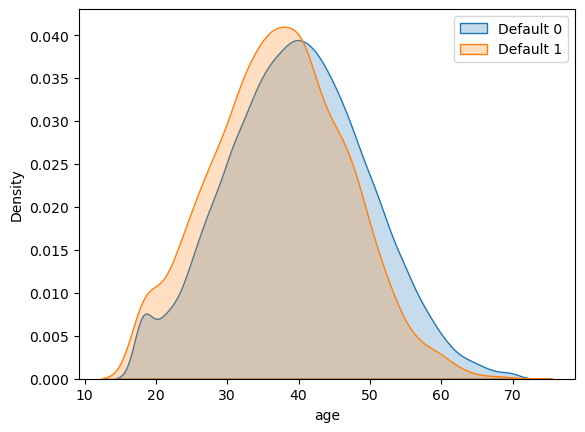

In [41]:
sb.kdeplot(df_train_1[df_train_1["default"]==0]["age"],fill=True,label="Default 0")
sb.kdeplot(df_train_1[df_train_1["default"]==1]["age"],fill=True,label="Default 1")
plt.legend()
plt.show()

In [42]:
numerical_cols

['number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio',
 'age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application']

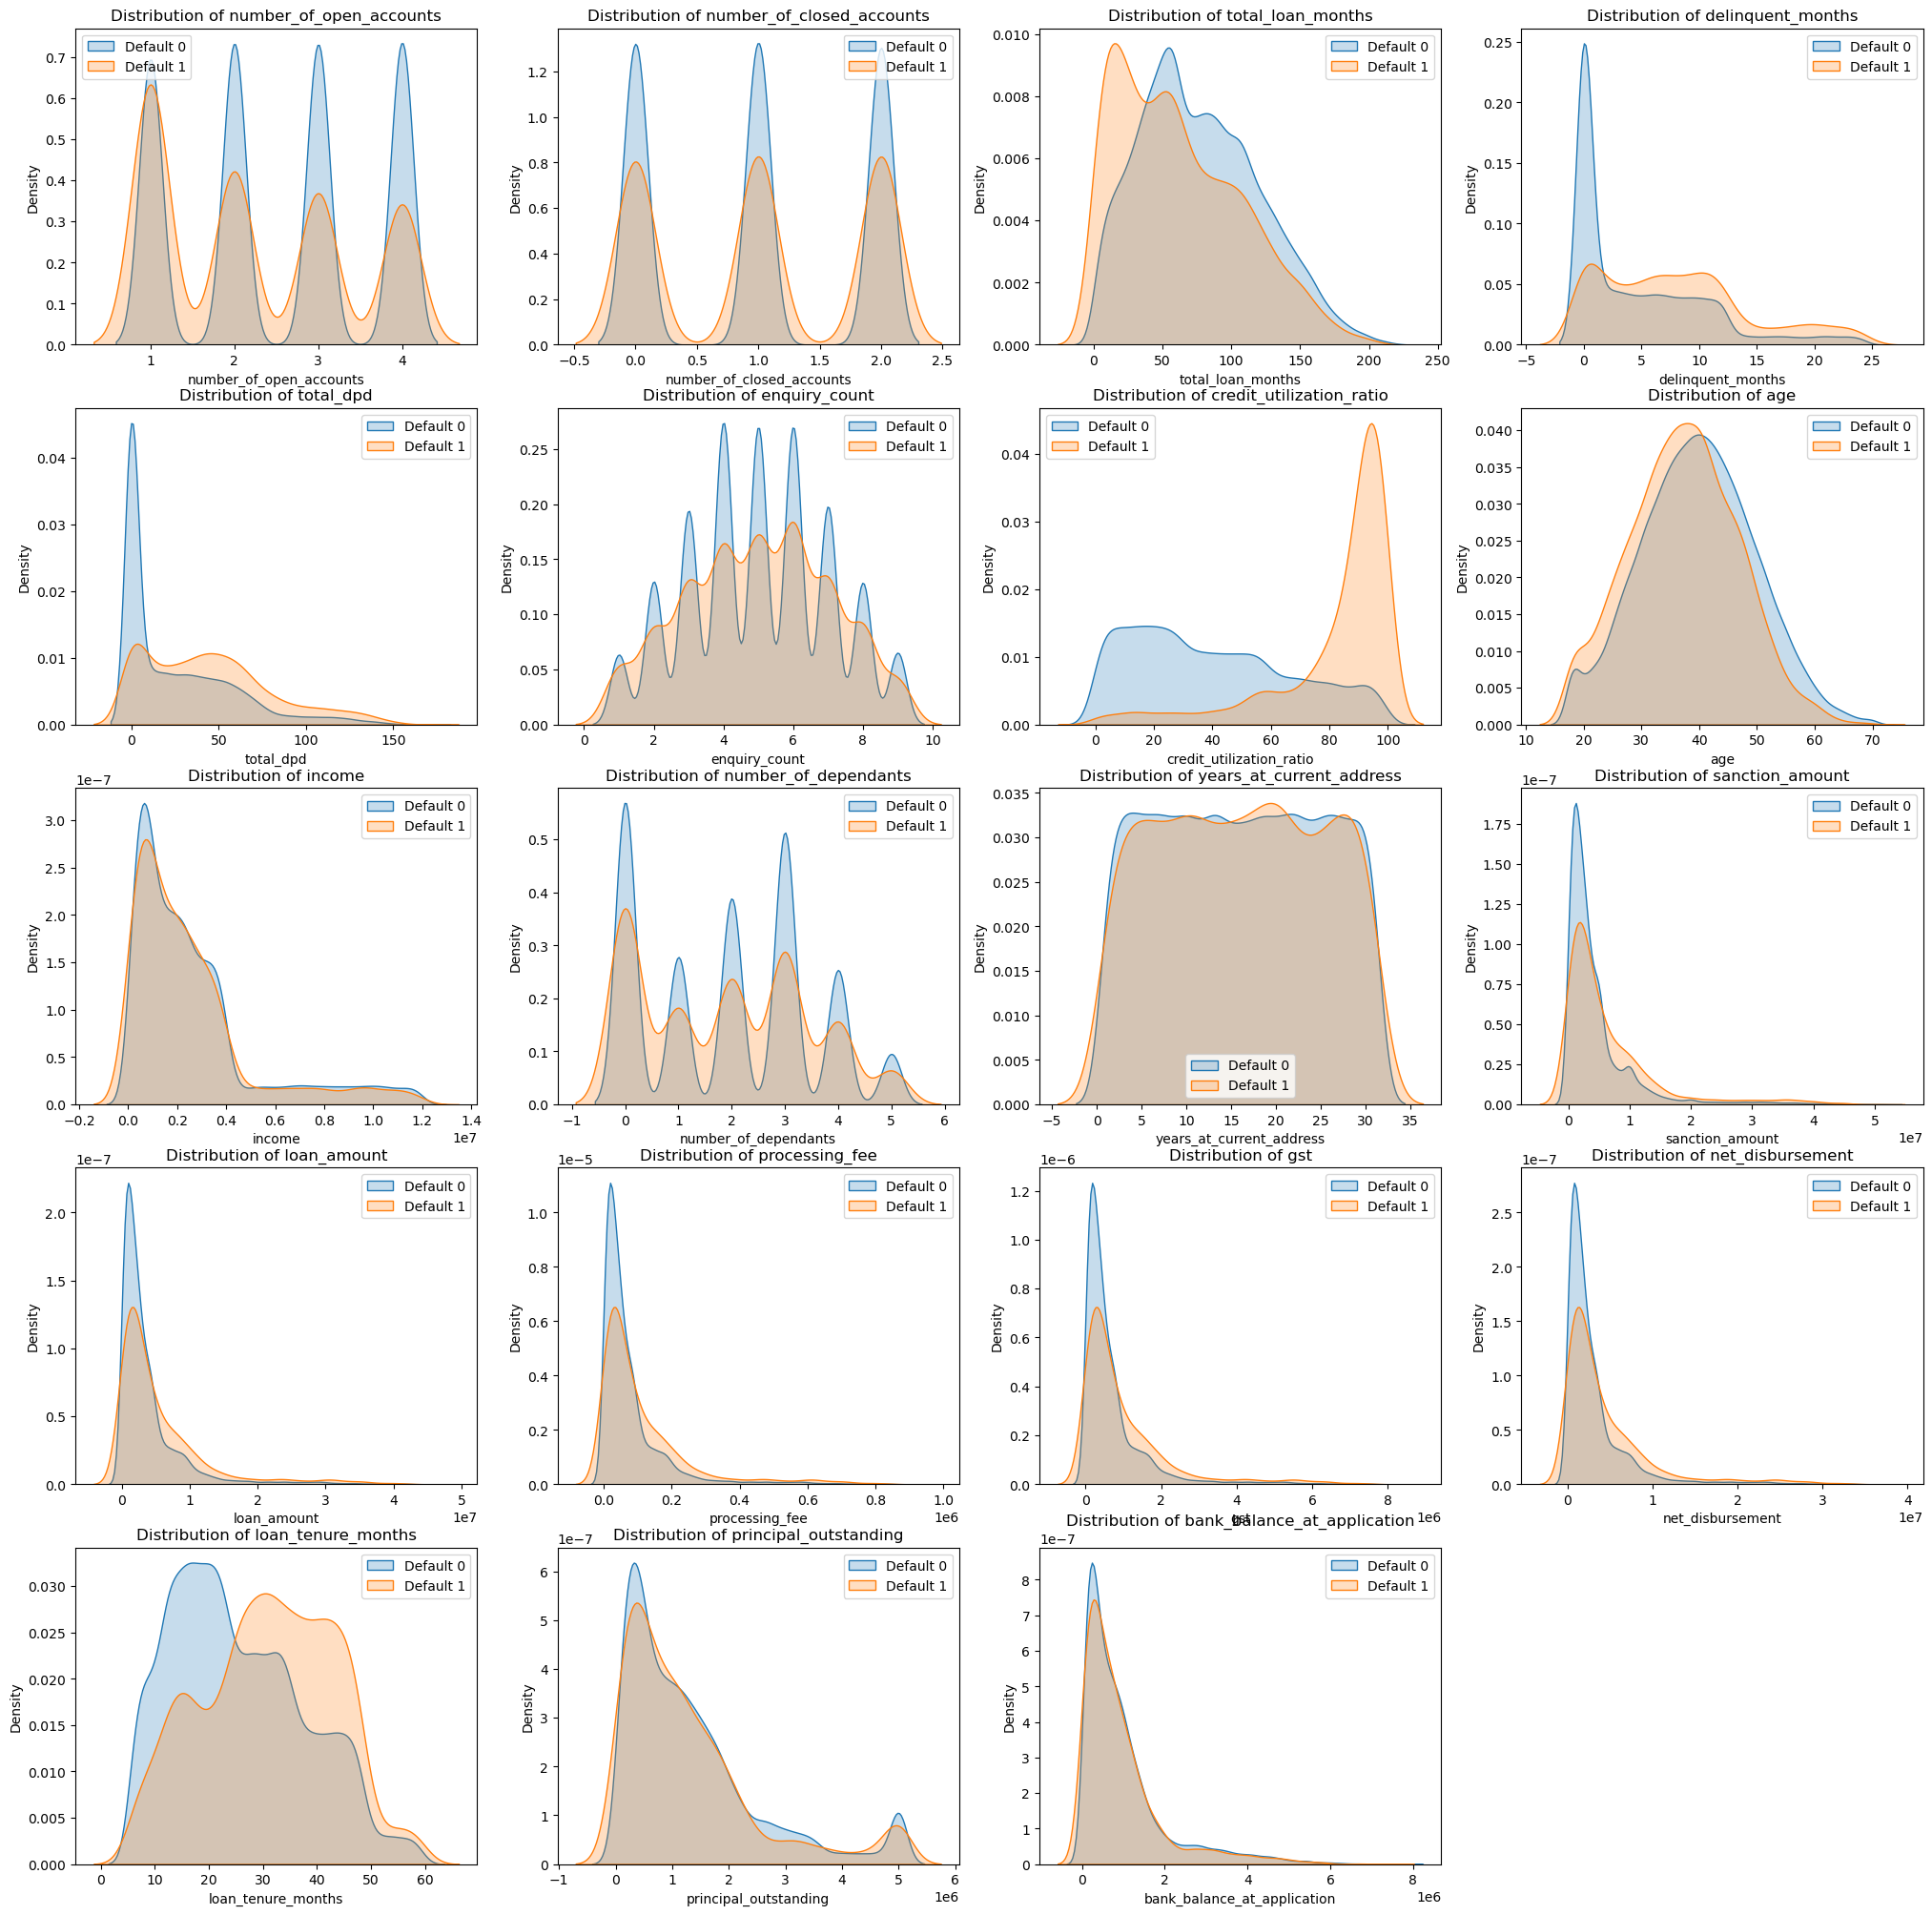

In [43]:
plt.figure(figsize=(25,25))
for i,col in enumerate(numerical_cols):
    plt.subplot(5,4,i+1)
    sb.kdeplot(df_train_1[df_train_1["default"]==0][col],fill=True,label="Default 0")
    sb.kdeplot(df_train_1[df_train_1["default"]==1][col],fill=True,label="Default 1")
    plt.legend()
    plt.title(f"Distribution of {col}")
plt.show()

**Insights**
1. Observe "delinquent_months","total_dpd","credit_utilization_ratio","loan_tenure_months" these 4 features which looks like a predictor.
2. From remaining features we didn't get obvious insights.

## Feature Engineering

**The factors that business mention that:**

1. Loan to Income ratio is a better metric compared to Loan amount and Income as individual features.
2. Delinquent months to loan months ratio is a better metric compared to those two individual features.
3. Average DPD per delinquent months is a better metric compared to total dpd and total delinquent months.
4. Credit utilization per Income is a better metric compared to Credit utilization ratio and Loan to income ratio.

### Calculating Loan to Income Ratio

In [44]:
df_train_1[["loan_amount","income"]].head()

,loan_amount,income
27434,3276000,1131000
13400,2540000,2343000
883,1920000,2891000
7303,298000,272000
45124,260000,141000


In [45]:
df_train_1["loan_income_ratio"] = round(df_train_1["loan_amount"]/df_train_1["income"],2)
df_train_1[["loan_amount","income","loan_income_ratio"]].head()

,loan_amount,income,loan_income_ratio
27434,3276000,1131000,2.900
13400,2540000,2343000,1.080
883,1920000,2891000,0.660
7303,298000,272000,1.100
45124,260000,141000,1.840


In [46]:
df_test["loan_income_ratio"] = round(df_test["loan_amount"]/df_test["income"],2)


In [47]:
print(df_train_1["loan_income_ratio"].isnull().sum())
df_test["loan_income_ratio"].isnull().sum()

0


0

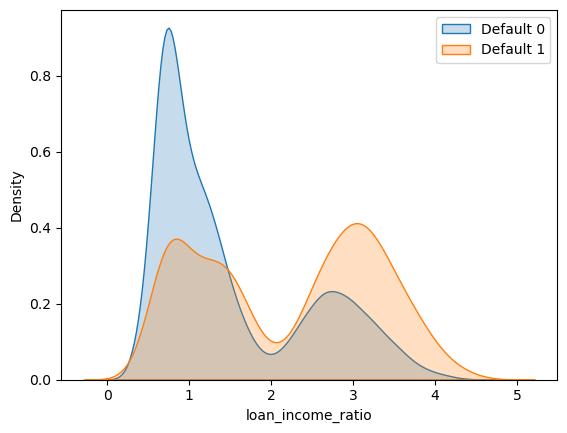

In [48]:
sb.kdeplot(df_train_1[df_train_1["default"]==0]["loan_income_ratio"],fill=True,label="Default 0")
sb.kdeplot(df_train_1[df_train_1["default"]==1]["loan_income_ratio"],fill=True,label="Default 1")
plt.legend()
plt.show()

### Calculating Delinquent months to Loan months Ratio

In [49]:
df_train_1[["delinquent_months","total_loan_months"]].head()

,delinquent_months,total_loan_months
27434,6,90
13400,4,119
883,14,83
7303,0,37
45124,6,62


In [50]:
df_train_1["delinquent_months_ratio"] = round(df_train_1["delinquent_months"]*100/df_train_1["total_loan_months"],2)
df_train_1[["delinquent_months","total_loan_months","delinquent_months_ratio"]].head()

,delinquent_months,total_loan_months,delinquent_months_ratio
27434,6,90,6.670
13400,4,119,3.360
883,14,83,16.870
7303,0,37,0.000
45124,6,62,9.680


In [51]:
df_test["delinquent_months_ratio"] = round(df_test["delinquent_months"]*100/df_test["total_loan_months"],2)


In [52]:
print(df_train_1["delinquent_months_ratio"].isnull().sum())
df_test["delinquent_months_ratio"].isnull().sum()

0


0

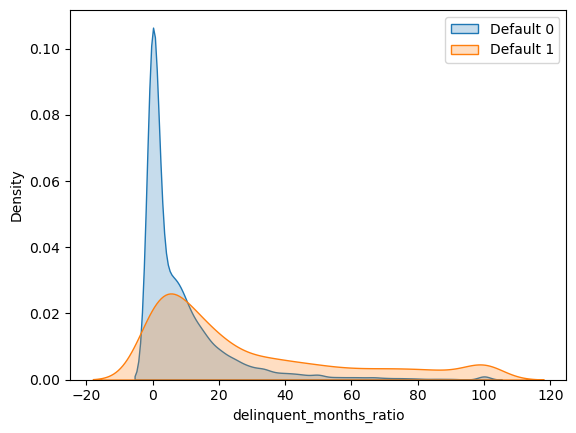

In [53]:
sb.kdeplot(df_train_1[df_train_1["default"]==0]["delinquent_months_ratio"],fill=True,label="Default 0")
sb.kdeplot(df_train_1[df_train_1["default"]==1]["delinquent_months_ratio"],fill=True,label="Default 1")
plt.legend()
plt.show()

### Calculating Average DPD to Delinquent months ratio

In [54]:
df_train_1["Avg_DPD"] = np.where(df_train_1["delinquent_months"]!=0,
                                round(df_train_1["total_dpd"]/df_train_1["delinquent_months"],2),
                                 0
                                )
df_test["Avg_DPD"] = np.where(df_test["delinquent_months"]!=0,
                                round(df_test["total_dpd"]/df_test["delinquent_months"],2),
                                 0
                                )
df_train_1[["total_dpd","delinquent_months","Avg_DPD"]].head()

,total_dpd,delinquent_months,Avg_DPD
27434,33,6,5.500
13400,17,4,4.250
883,78,14,5.570
7303,0,0,0.000
45124,28,6,4.670


In [55]:
print(df_train_1["Avg_DPD"].isna().sum())
print(df_test["Avg_DPD"].isna().sum())

0
0


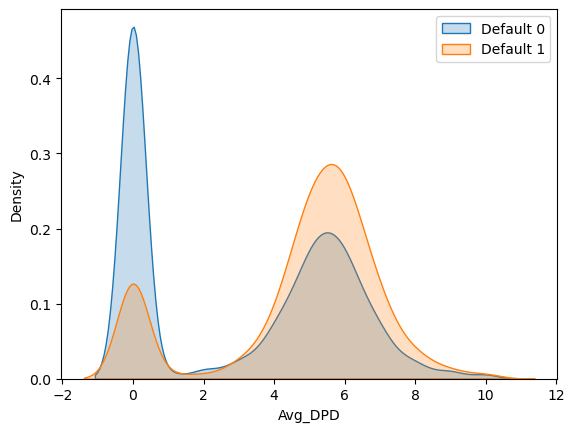

In [56]:
sb.kdeplot(df_train_1[df_train_1["default"]==0]["Avg_DPD"],fill=True,label="Default 0")
sb.kdeplot(df_train_1[df_train_1["default"]==1]["Avg_DPD"],fill=True,label="Default 1")
plt.legend()
plt.show()

In [57]:
df_train_1[["credit_utilization_ratio","loan_income_ratio"]].head()

,credit_utilization_ratio,loan_income_ratio
27434,59,2.900
13400,92,1.080
883,83,0.660
7303,34,1.100
45124,19,1.840


In [58]:
df_train_1["credit_income_ratio"] = round(df_train_1["credit_utilization_ratio"]/df_train_1["loan_income_ratio"],2)
df_train_1[["credit_utilization_ratio","loan_income_ratio","credit_income_ratio"]].head()

,credit_utilization_ratio,loan_income_ratio,credit_income_ratio
27434,59,2.900,20.340
13400,92,1.080,85.190
883,83,0.660,125.760
7303,34,1.100,30.910
45124,19,1.840,10.330


In [59]:
df_test["credit_income_ratio"] = round(df_test["credit_utilization_ratio"]/df_test["loan_income_ratio"],2)


In [60]:
print(df_train_1["credit_income_ratio"].isna().sum())
df_test["credit_income_ratio"].isna().sum()

0


0

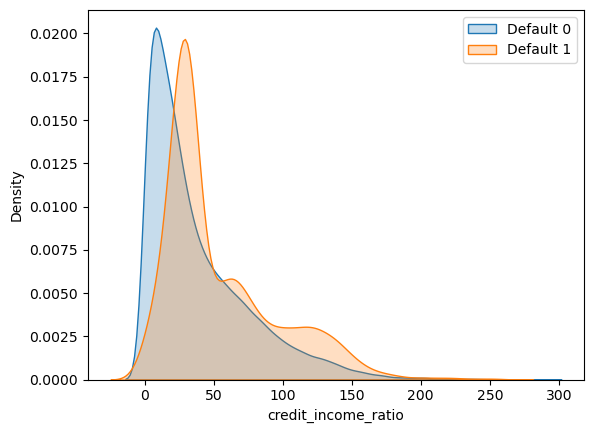

In [61]:
sb.kdeplot(df_train_1[df_train_1["default"]==0]["credit_income_ratio"],fill=True,label="Default 0")
sb.kdeplot(df_train_1[df_train_1["default"]==1]["credit_income_ratio"],fill=True,label="Default 1")
plt.legend()
plt.show()

## Feature Selection

In [62]:
df_train_1.columns

Index(['cust_id', 'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio', 'age', 'gender', 'marital_status',
       'employment_status', 'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'default',
       'loan_income_ratio', 'delinquent_months_ratio', 'Avg_DPD',
       'credit_income_ratio'],
      dtype='object')

In [63]:
cols_to_remove = ["cust_id","loan_id","loan_amount","income","delinquent_months","total_loan_months","total_dpd","disbursal_date","installment_start_dt"]
df_train_2 = df_train_1.drop(cols_to_remove,axis=1)
df_test = df_test.drop(cols_to_remove,axis=1)

In [64]:
df_train_2.columns

Index(['number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'age', 'gender', 'marital_status',
       'employment_status', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_purpose',
       'loan_type', 'sanction_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'default', 'loan_income_ratio',
       'delinquent_months_ratio', 'Avg_DPD', 'credit_income_ratio'],
      dtype='object')

## Scaling the features to calculate VIF

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

X_train = df_train_2.drop("default",axis=1)
y_train = df_train_2["default"]

cols_to_scale = X_train.select_dtypes(include=["int64","float64"]).columns.tolist()
cols_to_scale.remove('zipcode')

In [66]:
X_test = df_test.drop("default",axis=1)
y_test = df_test["default"]

In [67]:
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,loan_income_ratio,delinquent_months_ratio,Avg_DPD,credit_income_ratio
count,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000
mean,0.499,0.498,0.500,0.438,0.415,0.388,0.500,418763.451,0.089,0.083,0.083,0.083,0.375,0.262,0.124,0.294,0.104,0.329,0.139
std,0.372,0.408,0.253,0.297,0.190,0.307,0.298,168837.509,0.121,0.113,0.113,0.113,0.234,0.245,0.134,0.228,0.173,0.290,0.133
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,110001.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.375,0.182,0.288,0.000,0.233,302001.000,0.020,0.019,0.019,0.019,0.189,0.078,0.034,0.110,0.000,0.000,0.041
50%,0.333,0.500,0.500,0.394,0.423,0.400,0.500,400001.000,0.050,0.046,0.046,0.046,0.340,0.194,0.083,0.201,0.038,0.433,0.096
75%,0.667,1.000,0.625,0.677,0.538,0.600,0.767,560001.000,0.098,0.096,0.096,0.096,0.547,0.353,0.156,0.504,0.131,0.575,0.202
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,700001.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [68]:
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])
X_test.describe()

,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,loan_income_ratio,delinquent_months_ratio,Avg_DPD,credit_income_ratio
count,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000,12498.000
mean,0.504,0.507,0.503,0.439,0.414,0.386,0.503,420098.056,0.093,0.082,0.082,0.082,0.379,0.263,0.141,0.293,0.104,0.331,0.138
std,0.374,0.406,0.256,0.297,0.189,0.307,0.296,169419.473,0.125,0.111,0.111,0.111,0.235,0.245,0.152,0.226,0.174,0.291,0.133
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,110001.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.375,0.182,0.288,0.000,0.233,302001.000,0.022,0.020,0.020,0.020,0.189,0.079,0.039,0.110,0.000,0.000,0.041
50%,0.667,0.500,0.500,0.394,0.423,0.400,0.500,411001.000,0.052,0.046,0.046,0.046,0.358,0.195,0.095,0.203,0.038,0.433,0.094
75%,1.000,1.000,0.750,0.677,0.538,0.600,0.767,560001.000,0.104,0.096,0.096,0.096,0.547,0.355,0.178,0.501,0.129,0.575,0.199
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,700001.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df["Columns"] = data.columns
    vif_df["Coefficients"] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

calculate_vif(X_train[cols_to_scale])

C:\Users\Chatla Manikanta\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Columns,Coefficients
0,number_of_open_accounts,4.349
1,number_of_closed_accounts,2.354
2,enquiry_count,6.366
3,credit_utilization_ratio,10.433
4,age,5.842
5,number_of_dependants,2.724
6,years_at_current_address,3.388
7,sanction_amount,102.229
8,processing_fee,inf
9,gst,inf


In [70]:
cols_to_remove = ['sanction_amount','processing_fee','gst','net_disbursement','principal_outstanding']
X_train_1 = X_train.drop(cols_to_remove,axis=1)
numeric_columns = X_train_1.select_dtypes(include=["int64","float64"]).columns.tolist()
numeric_columns.remove('zipcode')

In [71]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Columns,Coefficients
0,number_of_open_accounts,4.316
1,number_of_closed_accounts,2.339
2,enquiry_count,6.337
3,credit_utilization_ratio,10.123
4,age,5.505
5,number_of_dependants,2.720
6,years_at_current_address,3.370
7,loan_tenure_months,6.146
8,bank_balance_at_application,1.884
9,loan_income_ratio,6.100


In [72]:
selected_num_features = vif_df.Columns.tolist()
selected_num_features

['number_of_open_accounts',
 'number_of_closed_accounts',
 'enquiry_count',
 'credit_utilization_ratio',
 'age',
 'number_of_dependants',
 'years_at_current_address',
 'loan_tenure_months',
 'bank_balance_at_application',
 'loan_income_ratio',
 'delinquent_months_ratio',
 'Avg_DPD',
 'credit_income_ratio']

In [73]:
numeric_columns.append('zipcode')
numeric_columns.append('default')

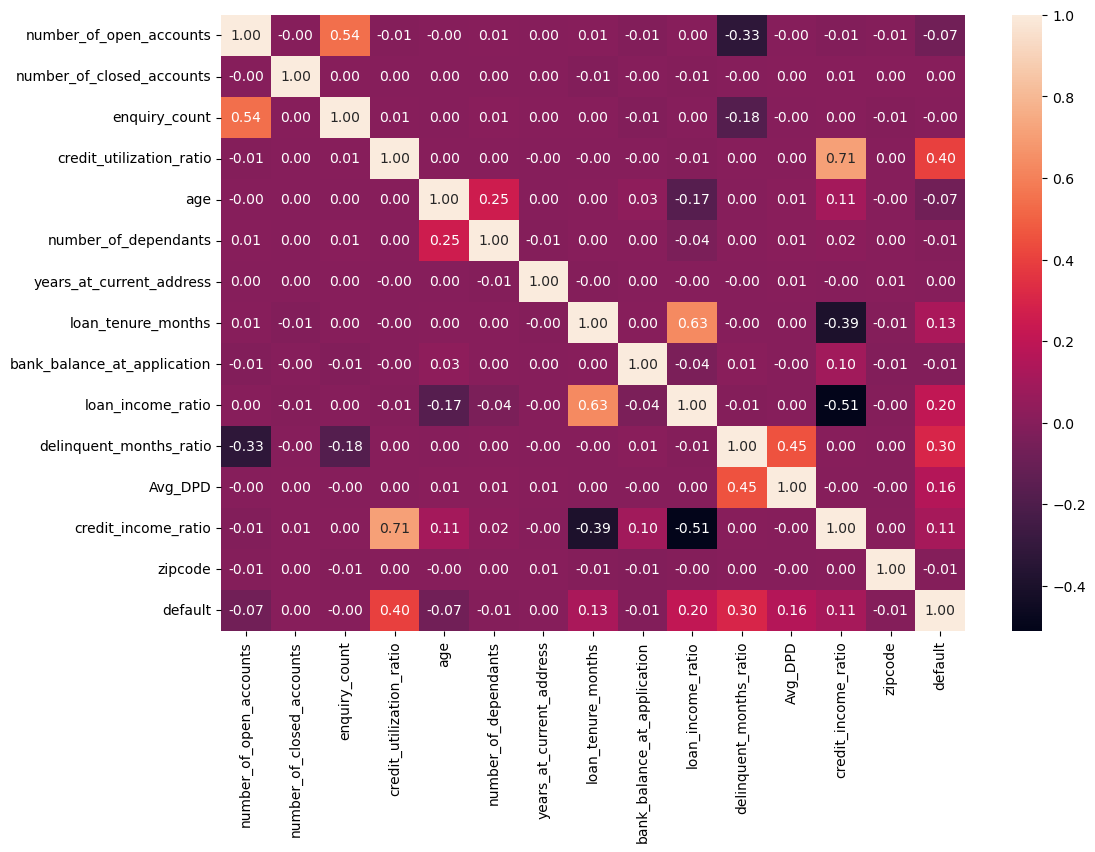

In [74]:
plt.figure(figsize=(12,8))
corr = df_train_2[numeric_columns].corr()
sb.heatmap(corr,annot=True,fmt="0.2f")
plt.show()

## Weight of Evidance and Information Value (IV)

In [75]:
def calculate_iv(df,feature,target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count':'total','sum':'Good'})
    grouped['Bad'] = grouped['total'] - grouped['Good']
    total_good = grouped["Good"].sum()
    total_bad = grouped["Bad"].sum()
    grouped["Good_pct"] = grouped["Good"]/total_good
    grouped["Bad_pct"] = grouped["Bad"]/total_bad
    grouped["woe"] = np.log(grouped["Good_pct"]/grouped["Bad_pct"])
    grouped["iv"] = grouped["woe"] * (grouped["Good_pct"] - grouped["Bad_pct"])

    grouped["woe"] = grouped["woe"].replace([np.inf,-np.inf],0)
    grouped["iv"] = grouped["iv"].replace([np.inf,-np.inf],0)
    total_iv = grouped["iv"].sum()
    return grouped,total_iv

df_woe_iv,total_iv = calculate_iv(pd.concat([X_train_1,y_train],axis=1),'credit_income_ratio','default')
print(total_iv)
df_woe_iv

1.2110401354650133


C:\Users\Chatla Manikanta\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total,Good,Bad,Good_pct,Bad_pct,woe,iv
credit_income_ratio,,,,,,,
0.000,567,7,560,0.002,0.016,-2.007,0.028
0.001,2,0,2,0.000,0.000,0.000,0.000
0.001,5,2,3,0.001,0.000,1.970,0.001
0.001,3,1,2,0.000,0.000,1.682,0.000
0.001,1,0,1,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...
0.946,1,0,1,0.000,0.000,0.000,0.000
0.953,1,0,1,0.000,0.000,0.000,0.000
0.960,2,0,2,0.000,0.000,0.000,0.000


In [76]:
iv_values = {}

for col in X_train_1.columns:
    if X_train_1[col].dtype == "object":
        _,iv_value = calculate_iv(pd.concat([X_train_1,y_train],axis=1),col,'default')
    else:
        # for continues variables we binned them to covert continues variables to categorical variables
        X_binned = pd.cut(X_train_1[col],bins=10,labels=False)
        _,iv_value = calculate_iv(pd.concat([X_binned,y_train],axis=1),col,'default')
    iv_values[col] = iv_value
iv_values

C:\Users\Chatla Manikanta\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'number_of_open_accounts': 0.07324250836253295,
 'number_of_closed_accounts': 0.00026280824021760536,
 'enquiry_count': 0.005484982638303533,
 'credit_utilization_ratio': 2.4228228499400095,
 'age': 0.07592687127752061,
 'gender': 0.000482276463421216,
 'marital_status': 0.002196681370832318,
 'employment_status': 0.002447818101774487,
 'number_of_dependants': 0.00364589452118596,
 'residence_type': 0.2594019617563985,
 'years_at_current_address': 0.001042536380353028,
 'city': 0.000817870465334103,
 'state': 0.0007881984519711978,
 'zipcode': 0.0007436024782513755,
 'loan_purpose': 0.39377543144164784,
 'loan_type': 0.17304705897793143,
 'loan_tenure_months': 0.23450610202970526,
 'bank_balance_at_application': 0.004242001247914226,
 'loan_income_ratio': 0.4915664145044282,
 'delinquent_months_ratio': 0.678322540101926,
 'Avg_DPD': 0.42123646562822287,
 'credit_income_ratio': 0.21492448525352095}

In [77]:
df_iv = pd.DataFrame(list(iv_values.items()),columns=["Feature","IV"]).sort_values(by="IV",ascending=False)
selected_features = df_iv[df_iv["IV"]>0.02].Feature.tolist()
selected_features

['credit_utilization_ratio',
 'delinquent_months_ratio',
 'loan_income_ratio',
 'Avg_DPD',
 'loan_purpose',
 'residence_type',
 'loan_tenure_months',
 'credit_income_ratio',
 'loan_type',
 'age',
 'number_of_open_accounts']

## Feature Encoding

In [78]:
X_train_reduced = X_train_1[selected_features]
X_test_reduced = X_test[selected_features]

In [79]:
X_train_reduced.columns

Index(['credit_utilization_ratio', 'delinquent_months_ratio',
       'loan_income_ratio', 'Avg_DPD', 'loan_purpose', 'residence_type',
       'loan_tenure_months', 'credit_income_ratio', 'loan_type', 'age',
       'number_of_open_accounts'],
      dtype='object')

In [80]:
X_train_reduced.describe()

,credit_utilization_ratio,delinquent_months_ratio,loan_income_ratio,Avg_DPD,loan_tenure_months,credit_income_ratio,age,number_of_open_accounts
count,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000,37487.000
mean,0.438,0.104,0.294,0.329,0.375,0.139,0.415,0.499
std,0.297,0.173,0.228,0.290,0.234,0.133,0.190,0.372
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.182,0.000,0.110,0.000,0.189,0.041,0.288,0.000
50%,0.394,0.038,0.201,0.433,0.340,0.096,0.423,0.333
75%,0.677,0.131,0.504,0.575,0.547,0.202,0.538,0.667
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [81]:
X_train_encoded = pd.get_dummies(X_train_reduced,drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced,drop_first=True)

In [82]:
X_train_encoded.head()

,credit_utilization_ratio,delinquent_months_ratio,loan_income_ratio,Avg_DPD,loan_tenure_months,credit_income_ratio,age,number_of_open_accounts,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,residence_type_Owned,residence_type_Rented,loan_type_Unsecured
27434,0.596,0.067,0.609,0.550,0.340,0.071,0.519,1.000,False,True,False,True,False,False
13400,0.929,0.034,0.183,0.425,0.509,0.296,0.212,0.667,False,False,False,True,False,False
883,0.838,0.169,0.084,0.557,0.245,0.437,0.615,0.333,False,False,True,False,False,True
7303,0.343,0.000,0.187,0.000,0.283,0.107,0.481,0.000,False,False,False,True,False,False
45124,0.192,0.097,0.361,0.467,0.736,0.036,0.250,0.333,True,False,False,True,False,False


In [83]:
X_train_encoded.columns

Index(['credit_utilization_ratio', 'delinquent_months_ratio',
       'loan_income_ratio', 'Avg_DPD', 'loan_tenure_months',
       'credit_income_ratio', 'age', 'number_of_open_accounts',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'residence_type_Owned', 'residence_type_Rented', 'loan_type_Unsecured'],
      dtype='object')

In [84]:
X_train_encoded.head(3)

,credit_utilization_ratio,delinquent_months_ratio,loan_income_ratio,Avg_DPD,loan_tenure_months,credit_income_ratio,age,number_of_open_accounts,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,residence_type_Owned,residence_type_Rented,loan_type_Unsecured
27434,0.596,0.067,0.609,0.550,0.340,0.071,0.519,1.000,False,True,False,True,False,False
13400,0.929,0.034,0.183,0.425,0.509,0.296,0.212,0.667,False,False,False,True,False,False
883,0.838,0.169,0.084,0.557,0.245,0.437,0.615,0.333,False,False,True,False,False,True


In [85]:
X_test_encoded.head(3)

,credit_utilization_ratio,delinquent_months_ratio,loan_income_ratio,Avg_DPD,loan_tenure_months,credit_income_ratio,age,number_of_open_accounts,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,residence_type_Owned,residence_type_Rented,loan_type_Unsecured
33553,0.121,0.043,0.256,0.900,0.528,0.029,0.346,0.333,True,False,False,True,False,False
9427,0.859,0.000,0.685,0.000,0.623,0.090,0.288,1.000,False,True,False,True,False,False
199,0.727,0.000,0.632,0.000,0.623,0.082,0.192,1.000,False,True,False,True,False,False


## Model Training

### Training Model without handling class Imbalance

In [86]:
y_train.value_counts()

default
0    34298
1     3189
Name: count, dtype: int64

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_lr = LogisticRegression()
model_lr.fit(X_train_encoded,y_train)
y_pred_lr = model_lr.predict(X_test_encoded)
cr = classification_report(y_test,y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



1. By using LogisticRegression model we got only 69% of the recall rate which is bad for credit risk model.
2. So, now we are use RandomForestClassifier and we'll see whether we'll get improved recall rate or not.

In [88]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_encoded,y_train)
y_pred_rf = model_rf.predict(X_test_encoded)
cr = classification_report(y_test,y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.85      0.70      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.91      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



Using RandomForestClassifier we got only 69% recall rate which is same as our LogisticRegression model recall rate. So, we are going to use XGBClassifier model and we'll verify that do our recall rate increases or not.

In [89]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train_encoded,y_train)
y_pred_xgb = model_xgb.predict(X_test_encoded)
cr = classification_report(y_test,y_pred_xgb)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.73      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.86      0.88     12498
weighted avg       0.96      0.96      0.96     12498



1. Yeah..! By using XGBClassifier we got 73% of the recall rate which is better than our previous models.But, still this is not an accurate model.
2. Now we'll use RandomSearchCV to find the best parameters from all the models.

In [90]:
from sklearn.model_selection import RandomizedSearchCV

log_model = LogisticRegression(max_iter=1000)
param_dist = {
    'C': np.logspace(-4, 4, 20),  
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   
}
rs_lr = RandomizedSearchCV(
    estimator=log_model,
    param_distributions=param_dist,
    n_iter = 50,
    scoring = 'f1',
    cv = 3,
    verbose = 2,
    random_state=42,
    n_jobs = -1
)
rs_lr.fit(X_train_encoded,y_train)
print(f"Best Parameters : {rs_lr.best_params_}")
print(f"Best Score : {rs_lr.best_score_}")

best_log_model = rs_lr.best_estimator_
y_pred = best_log_model.predict(X_test_encoded)
cr = classification_report(y_test,y_pred)
print(cr)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters : {'solver': 'lbfgs', 'C': 10000.0}
Best Score : 0.7626912496370624
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [91]:
xgb_model = XGBClassifier()
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  
}
rs_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=42
)
rs_xgb.fit(X_train_encoded,y_train)
print(f"Best Parameters : {rs_xgb.best_params_}")
print(f"Best Score : {rs_xgb.best_score_}")
best_xgb_model = rs_xgb.best_estimator_
y_pred = best_xgb_model.predict(X_test_encoded)
cr = classification_report(y_test,y_pred)
print(cr)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters : {'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best Score : 0.7882288095503123
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.82      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498



## Handling Class Imbalance

### Handling class imbalance using Under Sampling

In [92]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus = rus.fit_resample(X_train_encoded,y_train)


In [93]:
y_train_rus.value_counts()


default
0    3189
1    3189
Name: count, dtype: int64

In [94]:
model_lr = LogisticRegression()
model_lr.fit(X_train_rus,y_train_rus)
y_pred_lr = model_lr.predict(X_test_encoded)
cr = classification_report(y_test,y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.82     12498
weighted avg       0.95      0.92      0.93     12498



By handling the Class Imbalance we got 95% of the recall and which is need to our credit risk prediction

In [95]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_rus,y_train_rus)
y_pred_xgb = model_xgb.predict(X_test_encoded)
cr = classification_report(y_test,y_pred_xgb)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.58      0.95      0.72      1108

    accuracy                           0.93     12498
   macro avg       0.79      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498



### Using Over Sampling SMOTE Tomek

In [96]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt,y_train_smt = smt.fit_resample(X_train_encoded,y_train)

In [97]:
y_train_smt.value_counts()

default
0    34228
1    34228
Name: count, dtype: int64

In [98]:
model_lr = LogisticRegression(**rs_lr.best_params_)
model_lr.fit(X_train_smt,y_train_smt)
y_pred_lr = model_lr.predict(X_test_encoded)
cr = classification_report(y_test,y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498



In [99]:
model_xgb = XGBClassifier(**rs_xgb.best_params_)
model_xgb.fit(X_train_smt,y_train_smt)
y_pred_xgb = model_xgb.predict(X_test_encoded)
cr = classification_report(y_test,y_pred_xgb)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     11390
           1       0.60      0.95      0.74      1108

    accuracy                           0.94     12498
   macro avg       0.80      0.95      0.85     12498
weighted avg       0.96      0.94      0.95     12498



In [100]:
import optuna
from sklearn.metrics import f1_score,make_scorer
from sklearn.model_selection import cross_val_score
def objective(trial):
    param = {
        'C' : trial.suggest_float('C', 1e-4, 1e4, log=True),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])
    }
    model = LogisticRegression(**param,max_iter=10000)
    # make_scrorer() => converts the f1_score into a Scikit-learn scoring object
    # average="macro" => computes F1 for each class and takes the unweighted average
    f1_scorer = make_scorer(f1_score,average='macro') 
    scores = cross_val_score(model,X_train_smt,y_train_smt,cv=3,scoring=f1_scorer,n_jobs=-1) # n_jobs = -1 This tells scikit-learn to use all available CPU cores in parallel to speed up the computation.
    return np.mean(scores)


study_logistic = optuna.create_study(direction="maximize") # trying to maximize the F1 score
study_logistic.optimize(objective,n_trials=50) # Optuna uses Bayesian Optimization

[I 2025-08-09 11:45:28,029] A new study created in memory with name: no-name-a6b9ca1b-7864-4b10-a893-05cb7cedde05
[I 2025-08-09 11:45:28,482] Trial 0 finished with value: 0.9394830037488697 and parameters: {'C': 0.08286151383036493, 'solver': 'lbfgs', 'tol': 6.8455152428762886e-06, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9394830037488697.
[I 2025-08-09 11:45:29,046] Trial 1 finished with value: 0.9450301450657547 and parameters: {'C': 6.278362146952783, 'solver': 'liblinear', 'tol': 2.776800779507501e-06, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9450301450657547.
[I 2025-08-09 11:45:29,830] Trial 2 finished with value: 0.8713639583774432 and parameters: {'C': 0.0003799442811261799, 'solver': 'saga', 'tol': 1.6579182773265496e-06, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.9450301450657547.
[I 2025-08-09 11:45:30,132] Trial 3 finished with value: 0.9448980069193086 and parameters: {'C': 49.56071528373664, 'solver': 'newton-cg', 'tol':

In [101]:
print("Best Logistic Regression hyperparameters found:")
print(study_logistic.best_params)
print("Best Trail (F1 Score): ")
print(study_logistic.best_trial.value)


Best Logistic Regression hyperparameters found:
{'C': 143.05573754366026, 'solver': 'saga', 'tol': 4.4477801062597374e-05, 'class_weight': None}
Best Trail (F1 Score): 
0.9451334744913238


In [102]:
model_lr = LogisticRegression(**study_logistic.best_params)
model_lr.fit(X_train_smt,y_train_smt)
y_pred = model_lr.predict(X_test_encoded)
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.84     12498
weighted avg       0.96      0.93      0.94     12498



In [103]:
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }
    model = XGBClassifier()
    f1_scorer = make_scorer(f1_score,average="macro")
    scores = cross_val_score(model,X_train_smt,y_train_smt,scoring=f1_scorer,cv=3,n_jobs=-1)
    return np.mean(scores)

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective,n_trials=50)

[I 2025-08-09 11:45:51,568] A new study created in memory with name: no-name-39ba4835-a9db-42fa-8235-247d97633fa9
[I 2025-08-09 11:45:52,690] Trial 0 finished with value: 0.9750737668241974 and parameters: {'lambda': 0.06438538694776655, 'alpha': 1.4014988696748074, 'subsample': 0.757427078650144, 'colsample_bytree': 0.6076050611059807, 'max_depth': 7, 'eta': 0.11208125190636167, 'gamma': 1.7950308210529953, 'scale_pos_weight': 9.007517266172934, 'min_child_weight': 2, 'max_delta_step': 8}. Best is trial 0 with value: 0.9750737668241974.
[I 2025-08-09 11:45:53,839] Trial 1 finished with value: 0.9750737668241974 and parameters: {'lambda': 0.02786121988638265, 'alpha': 1.2010148252860167, 'subsample': 0.6423704096726292, 'colsample_bytree': 0.5567716269030862, 'max_depth': 8, 'eta': 0.09579798439060604, 'gamma': 8.983810635023941, 'scale_pos_weight': 1.5810058361730452, 'min_child_weight': 7, 'max_delta_step': 6}. Best is trial 0 with value: 0.9750737668241974.
[I 2025-08-09 11:45:54,97

In [104]:
print("Best XGBClassifier Hyperparameters found : ")
print(study_xgb.best_params)
print("F1 score : ")
print(study_xgb.best_trial.value)

Best XGBClassifier Hyperparameters found : 
{'lambda': 0.06438538694776655, 'alpha': 1.4014988696748074, 'subsample': 0.757427078650144, 'colsample_bytree': 0.6076050611059807, 'max_depth': 7, 'eta': 0.11208125190636167, 'gamma': 1.7950308210529953, 'scale_pos_weight': 9.007517266172934, 'min_child_weight': 2, 'max_delta_step': 8}
F1 score : 
0.9750737668241974


In [105]:
model_xgb = XGBClassifier(**study_xgb.best_params)
model_xgb.fit(X_train_smt,y_train_smt)
y_pred_xgb = model_xgb.predict(X_test_encoded)
cr = classification_report(y_test,y_pred_xgb)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11390
           1       0.56      0.96      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [106]:
best_model = model_lr
best_model

LogisticRegression(C=143.05573754366026, solver='saga',
                   tol=4.4477801062597374e-05)

## ROC Curve and AUC

In [107]:
from sklearn.metrics import roc_curve,auc

y_pred = best_model.predict_proba(X_test_encoded)[:,1]
fpr, tpr, threshold = roc_curve(y_test,y_pred)
fpr[:5],tpr[:5],threshold[:5]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.77963126e-05,
        8.77963126e-05]),
 array([0.        , 0.00090253, 0.2066787 , 0.2066787 , 0.21119134]),
 array([       inf, 0.99999996, 0.998936  , 0.99890592, 0.99886703]))

In [108]:
area = auc(fpr,tpr)
area

0.982868150223611

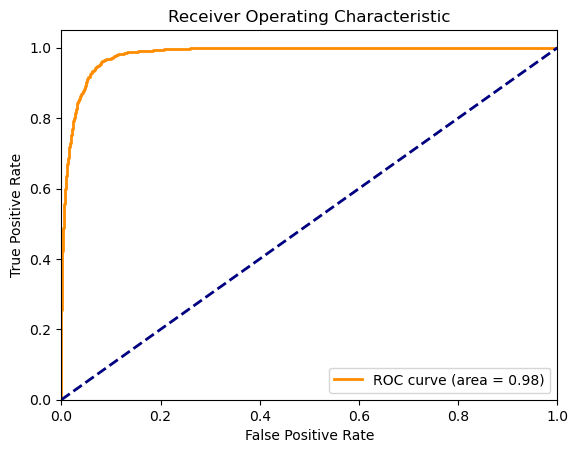

In [109]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Rank Ordering, KS Statistics and Gini Coefficient

In [110]:
gini_coeff = 2*area-1
gini_coeff

0.9657363004472219

In [111]:
probabilities = best_model.predict_proba(X_test_encoded)[:,1]
probabilities[:5]

array([3.42670692e-06, 7.59396277e-01, 1.28421442e-01, 4.21756606e-01,
       6.73449403e-04])

In [112]:
df_eval = pd.DataFrame({
    'Default_truth':y_test,
    'Default_probability':probabilities
})
df_eval.head()

,Default_truth,Default_probability
33553,0,0.000
9427,0,0.759
199,0,0.128
12447,0,0.422
39489,0,0.001


In [113]:
df_eval['Decile'] = pd.qcut(df_eval["Default_probability"],10,labels=False,duplicates='drop')
df_eval.head()

,Default_truth,Default_probability,Decile
33553,0,0.000,1
9427,0,0.759,8
199,0,0.128,7
12447,0,0.422,8
39489,0,0.001,5


In [114]:
df_eval[(df_eval["Decile"]==9)]['Default_truth'].value_counts()

Default_truth
1    913
0    337
Name: count, dtype: int64

In [115]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Min_probabilty':x['Default_probability'].min(),
    'Max_probability':x['Default_probability'].max(),
    'Events':x['Default_truth'].sum(),
    'Non_events':x['Default_truth'].count()-x['Default_truth'].sum()
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\Chatla Manikanta\AppData\Local\Temp\ipykernel_5364\1950025416.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Min_probabilty,Max_probability,Events,Non_events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1250.000
3,3,0.000,0.000,0.000,1249.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.004,1.000,1249.000
6,6,0.004,0.028,2.000,1247.000
7,7,0.028,0.197,17.000,1233.000
8,8,0.197,0.819,175.000,1075.000
9,9,0.819,1.000,913.000,337.000


In [116]:
df_decile["Event_pct"] =(df_decile["Events"]*100)/(df_decile['Events']+df_decile['Non_events'])
df_decile["Non_event_pct"] =(df_decile["Non_events"]*100)/(df_decile['Events']+df_decile['Non_events'])

In [117]:
df_decile.sort_values(by="Decile",ascending=False,inplace=True)
df_decile.reset_index(drop=True)

,Decile,Min_probabilty,Max_probability,Events,Non_events,Event_pct,Non_event_pct
0,9,0.819,1.000,913.000,337.000,73.040,26.960
1,8,0.197,0.819,175.000,1075.000,14.000,86.000
2,7,0.028,0.197,17.000,1233.000,1.360,98.640
3,6,0.004,0.028,2.000,1247.000,0.160,99.840
4,5,0.001,0.004,1.000,1249.000,0.080,99.920
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1249.000,0.000,100.000
7,2,0.000,0.000,0.000,1250.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [118]:
df_decile["Cumm_event"] = df_decile["Events"].cumsum()
df_decile["Non_cumm_event"] = df_decile["Non_events"].cumsum()
df_decile

,Decile,Min_probabilty,Max_probability,Events,Non_events,Event_pct,Non_event_pct,Cumm_event,Non_cumm_event
9,9,0.819,1.000,913.000,337.000,73.040,26.960,913.000,337.000
8,8,0.197,0.819,175.000,1075.000,14.000,86.000,1088.000,1412.000
7,7,0.028,0.197,17.000,1233.000,1.360,98.640,1105.000,2645.000
6,6,0.004,0.028,2.000,1247.000,0.160,99.840,1107.000,3892.000
5,5,0.001,0.004,1.000,1249.000,0.080,99.920,1108.000,5141.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000
3,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000
2,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000
0,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000


In [119]:
1108+11390

12498

In [120]:
df_decile["Cumm_event_pct"] = (df_decile["Cumm_event"]*100)/df_decile["Events"].sum()
df_decile["Non_cumm_event_pct"] = (df_decile["Non_cumm_event"]*100)/df_decile["Non_events"].sum()
df_decile

,Decile,Min_probabilty,Max_probability,Events,Non_events,Event_pct,Non_event_pct,Cumm_event,Non_cumm_event,Cumm_event_pct,Non_cumm_event_pct
9,9,0.819,1.000,913.000,337.000,73.040,26.960,913.000,337.000,82.401,2.959
8,8,0.197,0.819,175.000,1075.000,14.000,86.000,1088.000,1412.000,98.195,12.397
7,7,0.028,0.197,17.000,1233.000,1.360,98.640,1105.000,2645.000,99.729,23.222
6,6,0.004,0.028,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170
5,5,0.001,0.004,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136
4,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111
3,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076
2,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051
1,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025
0,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000


In [121]:
df_decile["KS"] = abs(df_decile["Cumm_event_pct"]-df_decile["Non_cumm_event_pct"])
df_decile

,Decile,Min_probabilty,Max_probability,Events,Non_events,Event_pct,Non_event_pct,Cumm_event,Non_cumm_event,Cumm_event_pct,Non_cumm_event_pct,KS
9,9,0.819,1.000,913.000,337.000,73.040,26.960,913.000,337.000,82.401,2.959,79.442
8,8,0.197,0.819,175.000,1075.000,14.000,86.000,1088.000,1412.000,98.195,12.397,85.798
7,7,0.028,0.197,17.000,1233.000,1.360,98.640,1105.000,2645.000,99.729,23.222,76.507
6,6,0.004,0.028,2.000,1247.000,0.160,99.840,1107.000,3892.000,99.910,34.170,65.739
5,5,0.001,0.004,1.000,1249.000,0.080,99.920,1108.000,5141.000,100.000,45.136,54.864
4,4,0.000,0.001,0.000,1250.000,0.000,100.000,1108.000,6391.000,100.000,56.111,43.889
3,3,0.000,0.000,0.000,1249.000,0.000,100.000,1108.000,7640.000,100.000,67.076,32.924
2,2,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,8890.000,100.000,78.051,21.949
1,1,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,10140.000,100.000,89.025,10.975
0,0,0.000,0.000,0.000,1250.000,0.000,100.000,1108.000,11390.000,100.000,100.000,0.000


**Insights**
1. We are getting KS>40% in our first 3 deciles, which means our model is predicting pretty good.
2. We can show this representation to our business stakeholders to make sure that our model is fit to deploy into the industry.

In [122]:
coeff = best_model.coef_[0]
df_coef = pd.DataFrame(coeff,index=X_test_encoded.columns,columns=["Coefficients"]).sort_values(by="Coefficients")
df_coef

,Coefficients
loan_purpose_Home,-3.418
residence_type_Owned,-1.874
age,-0.040
loan_tenure_months,0.815
loan_purpose_Personal,0.920
loan_type_Unsecured,0.920
number_of_open_accounts,1.068
loan_purpose_Education,1.098
Avg_DPD,1.835
residence_type_Rented,1.906


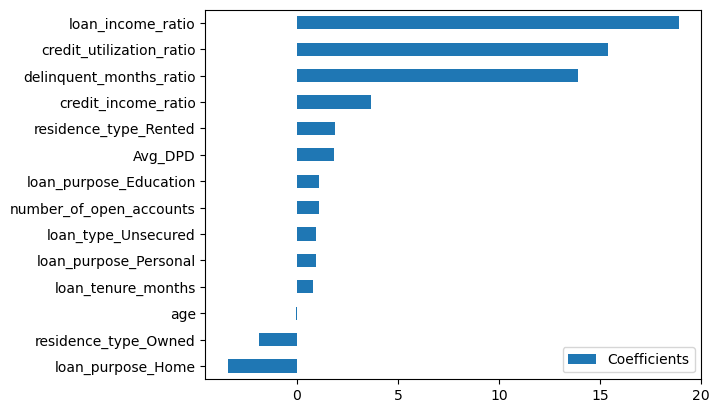

In [123]:
df_coef.plot(kind="barh")
plt.show()

## SHAP

In [124]:
!pip install shap

In [125]:
best_xgb_model = model_xgb
best_xgb_model

XGBClassifier(alpha=1.4014988696748074, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6076050611059807, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.11208125190636167, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=1.7950308210529953, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              lambda=0.06438538694776655, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=8,
              max_depth=7, max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, ...)

In [126]:
import shap

explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_test_encoded)

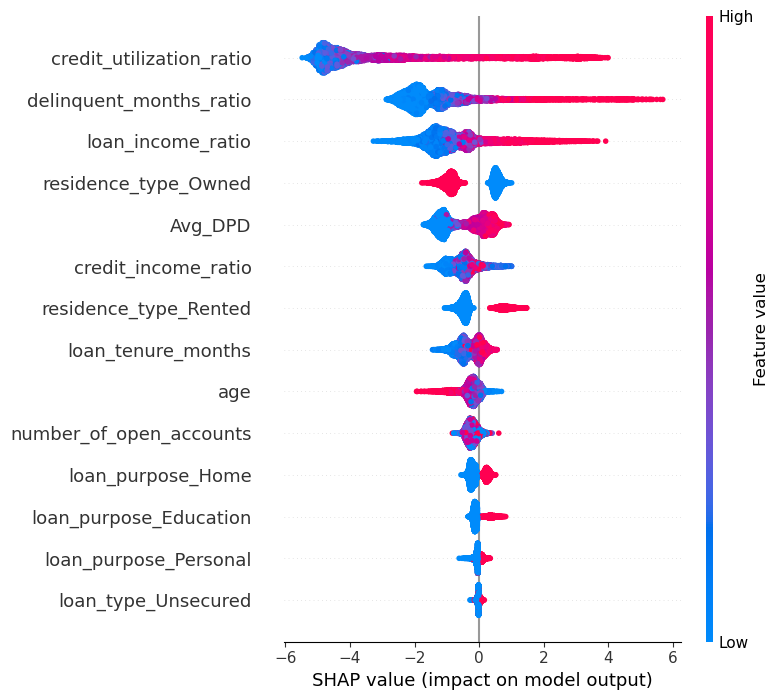

In [127]:
shap.summary_plot(shap_values,X_test_encoded)

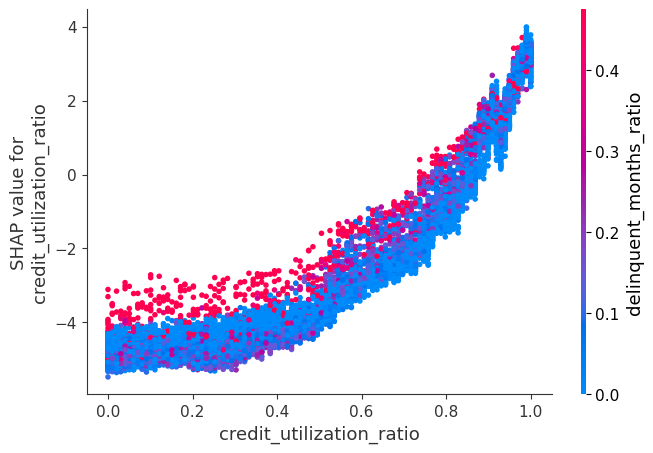

In [128]:
shap.dependence_plot('credit_utilization_ratio',shap_values,X_test_encoded)

In [129]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0,:],X_test_encoded.iloc[0,:])

In [130]:
explainer.expected_value # this is the avg predicted probablity of the positive class over the training data.

2.6717243

In [131]:
p = 1/(1+np.exp(-1.8007308))
p # Model, on average, predicts class 1 with 85.8% confidence

0.8582378716196143

In [132]:
shap_values[0,:]

array([-4.696352  , -1.8549443 , -0.5541585 ,  0.5473869 ,  0.03325455,
       -1.1005192 ,  0.02071902, -0.42054233,  0.33168122, -0.21328315,
       -0.0830218 , -0.7523065 , -0.36421052, -0.0189825 ], dtype=float32)

In [133]:
X_test_encoded.columns

Index(['credit_utilization_ratio', 'delinquent_months_ratio',
       'loan_income_ratio', 'Avg_DPD', 'loan_tenure_months',
       'credit_income_ratio', 'age', 'number_of_open_accounts',
       'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal',
       'residence_type_Owned', 'residence_type_Rented', 'loan_type_Unsecured'],
      dtype='object')

In [136]:
xgb_params = {
    'lambda': 0.06438538694776655,
    'alpha': 1.4014988696748074,
    'subsample': 0.757427078650144,
    'colsample_bytree': 0.6076050611059807,
    'max_depth': 7,
    'eta': 0.11208125190636167,
    'gamma': 1.7950308210529953,
    'scale_pos_weight': 9.007517266172934,
    'min_child_weight': 2,
    'max_delta_step': 8
}

models = [
    (
        'Logistic Regression',
        {'C': 143.05573754366026, 'solver': 'saga', 'tol': 4.4477801062597374e-05, 'class_weight': None},
        LogisticRegression(C=143.05573754366026, solver="saga", tol=4.4477801062597374e-05, class_weight=None),
        (X_train_smt, y_train_smt),
        (X_test_encoded, y_test)
    ),
    (
        'XGBClassifier',
        xgb_params,
        XGBClassifier(**xgb_params),
        (X_train_smt, y_train_smt),
        (X_test_encoded, y_test)
    )
]


## Experiment Tracking

In [137]:
import mlflow

In [147]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
mlflow.set_experiment("Credit Risk Model")

for model_name,params,model,train,test in models:
    X_train,y_train = train
    X_test,y_test = test

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test,y_pred,output_dict=True)

    with mlflow.start_run(run_name=model_name):
        mlflow.log_params({"model_name":model_name,"params":params})
        mlflow.log_metrics({
            'accuracy':report['accuracy'],
            'recall_class_0':report['0']['recall'],
            'recall_class_1':report['1']['recall'],
            'f1_score_macro':report['macro avg']['f1-score']
        })
        if 'XGB' in model_name:
            mlflow.xgboost.log_model(model,f"{model_name}")
        else:
            mlflow.sklearn.log_model(model,f"{model_name}")

2025/08/09 14:00:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/09 14:00:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/609524670335251721/runs/c7f849e0c5ae4d24af9af1745a85cff3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/609524670335251721


2025/08/09 14:00:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\Chatla Manikanta\anaconda3\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:00:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/08/09 14:00:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBClassifier at: http://127.0.0.1:5000/#/experiments/609524670335251721/runs/1685b1e94b994e0c8858e2c4ccaa3541
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/609524670335251721


## Register Model

In [148]:
model_name = "Logistic Regression"
run_id = input("Enter model run id: ")
model_uri = f"runs:/{run_id}/{model_name}"

mlflow.register_model(model_uri,model_name)

Enter model run id:  c7f849e0c5ae4d24af9af1745a85cff3


Successfully registered model 'Logistic Regression'.
2025/08/09 14:09:50 WARNING mlflow.tracking._model_registry.fluent: Run with id c7f849e0c5ae4d24af9af1745a85cff3 has no artifacts at artifact path 'Logistic Regression', registering model based on models:/m-20d99d1884224d21bb13f3fd1382eae9 instead
2025/08/09 14:09:51 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression, version 1
Created version '1' of model 'Logistic Regression'.


<ModelVersion: aliases=[], creation_timestamp=1754728790949, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1754728790949, metrics=None, model_id=None, name='Logistic Regression', params=None, run_id='c7f849e0c5ae4d24af9af1745a85cff3', run_link='', source='models:/m-20d99d1884224d21bb13f3fd1382eae9', status='READY', status_message=None, tags={}, user_id='', version='1'>

## Load Model

In [150]:
model = mlflow.sklearn.load_model(f"models:/{model_name}@best_credit_risk_predictor")
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

## Loading from development environment to production environment

In [152]:
dev_model_uri = f"models:/{model_name}@best_credit_risk_predictor"
prod_model = "credit-risk-predictor"
client = mlflow.MlflowClient()
client.copy_model_version(dev_model_uri,prod_model)

Successfully registered model 'credit-risk-predictor'.
Copied version '1' of model 'Logistic Regression' to version '1' of model 'credit-risk-predictor'.


<ModelVersion: aliases=[], creation_timestamp=1754729532722, current_stage='None', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1754729532722, metrics=None, model_id=None, name='credit-risk-predictor', params=None, run_id='c7f849e0c5ae4d24af9af1745a85cff3', run_link='', source='models:/Logistic Regression/1', status='READY', status_message=None, tags={}, user_id='', version='1'>